Analysis of sleep, health, and lifestyle data

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [106]:
sleephealth = pd.read_csv('/Users/fatmagulgok/Desktop/spark/portfolio/datasets/sleephealth.csv')

In [107]:
sleephealth.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [108]:
sleephealth.shape

(374, 13)

Check for missing data. All columns are good except for many missing values in the Sleep Disorder column. From the context of the data, we know that missing values in this column simply equate to an observation not having a sleep disorder. Fill the n/a values with a string to denote this. 

In [109]:
sleephealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [110]:
sleephealth['Sleep Disorder'].fillna('No disorder', inplace=True)
sleephealth.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [111]:
sleephealth.iloc[:,1:].describe().round(1) # minus the person ID

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.0,374.0,374.0,374.0,374.0,374.0,374.0
mean,42.2,7.1,7.3,59.2,5.4,70.2,6816.8
std,8.7,0.8,1.2,20.8,1.8,4.1,1617.9
min,27.0,5.8,4.0,30.0,3.0,65.0,3000.0
25%,35.2,6.4,6.0,45.0,4.0,68.0,5600.0
50%,43.0,7.2,7.0,60.0,5.0,70.0,7000.0
75%,50.0,7.8,8.0,75.0,7.0,72.0,8000.0
max,59.0,8.5,9.0,90.0,8.0,86.0,10000.0


In [112]:
sleephealth.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,No disorder
freq,189,73,195,99,219


In [113]:
# Create a subset of the dataframe only containing the numerical variables in order to create a heatmap
sleepnum = sleephealth.drop(['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure','Sleep Disorder'], axis = 1)
sleepnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 20.6 KB


Correlation Heatmap

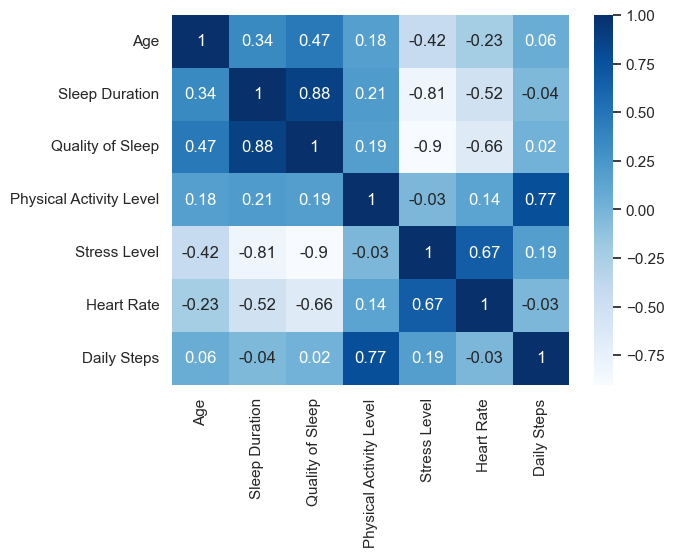

In [114]:
sns.heatmap(sleepnum.corr().round(2), annot = True, cmap = 'Blues');

In [115]:
qualsteps = sleephealth.groupby('Quality of Sleep').agg(Mean_steps = ('Daily Steps', 'mean'), Mean_dur = ('Sleep Duration', 'mean')).reset_index()
display(qualsteps.corr().round(2))
qualsteps.round(1)

,Quality of Sleep,Mean_steps,Mean_dur
Quality of Sleep,1.00,0.71,0.95
Mean_steps,0.71,1.00,0.47
Mean_dur,0.95,0.47,1.00


,Quality of Sleep,Mean_steps,Mean_dur
0,4,3880.0,5.9
1,5,4257.1,6.5
2,6,7092.4,6.2
3,7,6659.7,7.1
4,8,7462.4,7.4
5,9,6047.9,8.2


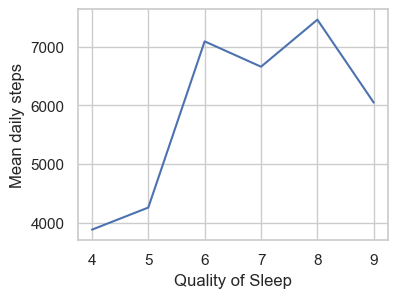

In [116]:
qualsteps.plot(kind = 'line', x = 'Quality of Sleep', y = 'Mean_steps', figsize=(4,3), ylabel='Mean daily steps', legend=False);

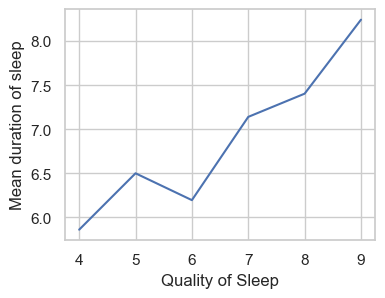

In [117]:
qualsteps.plot(kind = 'line', x = 'Quality of Sleep', y = 'Mean_dur', figsize=(4,3), ylabel='Mean duration of sleep', legend=False);

In [118]:
occupstress = sleephealth.groupby('Occupation')[['Stress Level']].value_counts().reset_index()
occupstress.head(8)

,Occupation,Stress Level,count
0,Accountant,4,26
1,Accountant,7,6
2,Accountant,6,3
3,Accountant,3,2
4,Doctor,8,33
5,Doctor,6,32
6,Doctor,3,4
7,Doctor,5,2


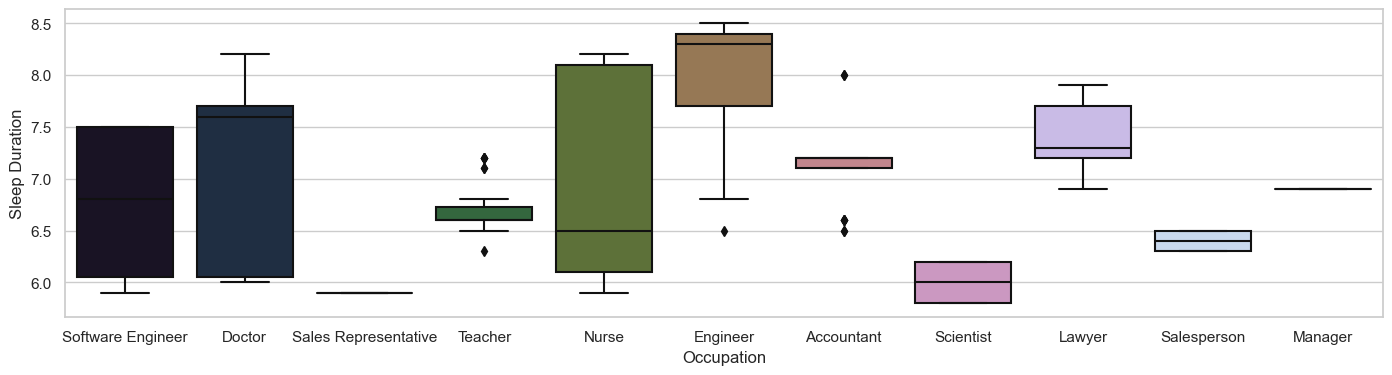

In [119]:
plt.subplots(figsize = (17,4))
ax = sns.boxplot(data = sleephealth, x = 'Occupation', y = 'Sleep Duration', palette='cubehelix')

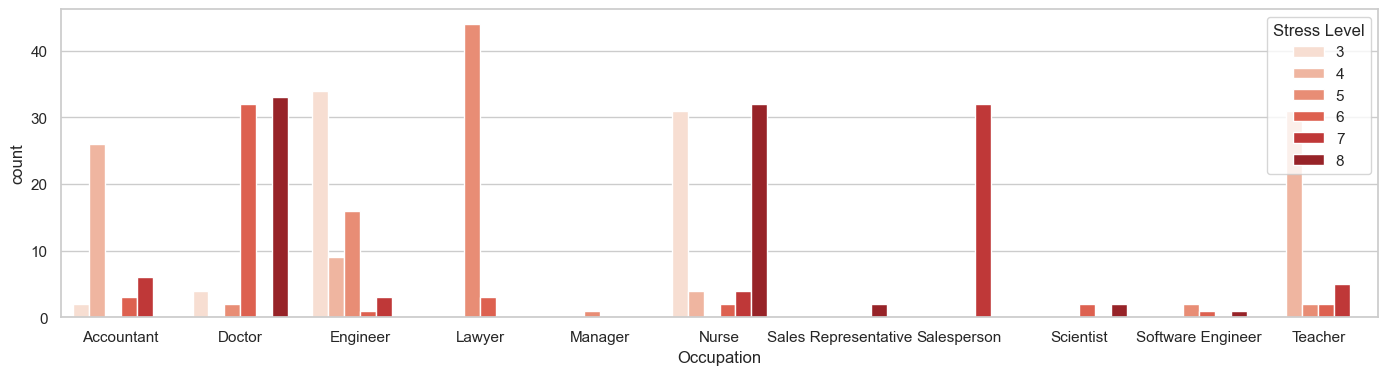

In [120]:
plt.subplots(figsize = (17,4))
ax = sns.barplot(data = occupstress, x = 'Occupation', y = 'count', hue = 'Stress Level', palette = 'Reds')

Looking at the bar chart we can see that the dataset doesn't seem to contain very many managers or sales representatives. Lets see how many observations of each profession actually appear in the dataset.

In [121]:
sleephealth[['Occupation']].value_counts()

Occupation          
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

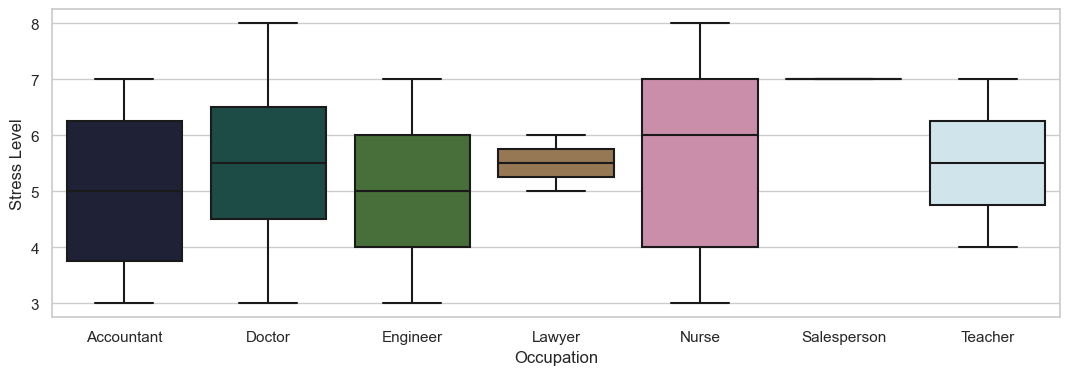

In [122]:
plt.subplots(figsize = (13,4))
ax = sns.boxplot(data = occupstress[~occupstress.Occupation.isin(['Scientist', 'Software Engineer', 'Sales Representative', 'Manager'])], x = 'Occupation', y = 'Stress Level', palette = 'cubehelix')

Investigate the 'salesperson' occupation. Looks like all 32 salespeople in the dataset have the same exact stress level. 

In [123]:
occupstress[occupstress.Occupation == 'Lawyer']

,Occupation,Stress Level,count
13,Lawyer,5,44
14,Lawyer,6,3


<Axes: xlabel='BMI Category', ylabel='Sleep Duration'>

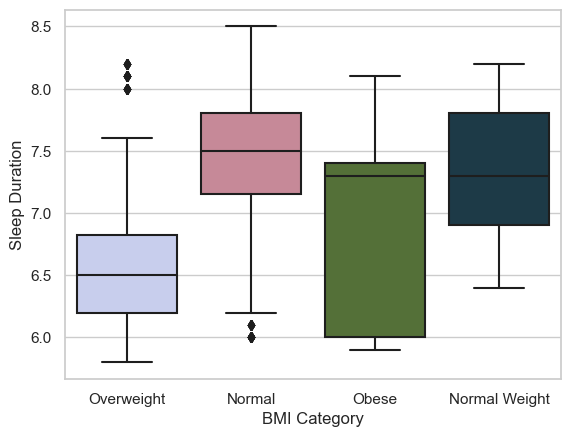

In [124]:
sns.boxplot(data = sleephealth, x = 'BMI Category', y = 'Sleep Duration', palette='cubehelix_r')

In [125]:
agesleep = sleephealth.groupby('Age').agg(median = ('Sleep Duration', 'median'), min = ('Sleep Duration', 'min'), max = ('Sleep Duration', 'max'), mean = ('Sleep Duration', 'mean'))

In [126]:
agesleep.head()

,median,min,max,mean
Age,,,,
27,6.1,6.1,6.1,6.100000
28,5.9,5.9,6.2,6.020000
29,6.3,6.0,7.8,6.669231
30,7.7,6.4,7.9,7.569231
31,7.7,6.1,7.9,7.444444


In [127]:
sleephealth.Age.describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

''

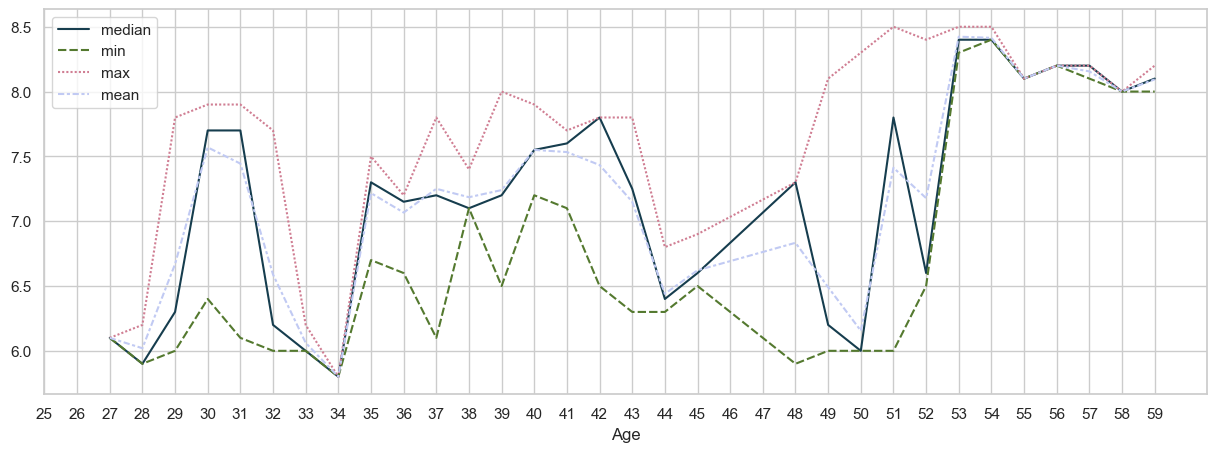

In [128]:
plt.subplots(figsize = (15,5))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data = agesleep, palette = 'cubehelix')
ax.set_xticks(np.arange(25,60,1))
;

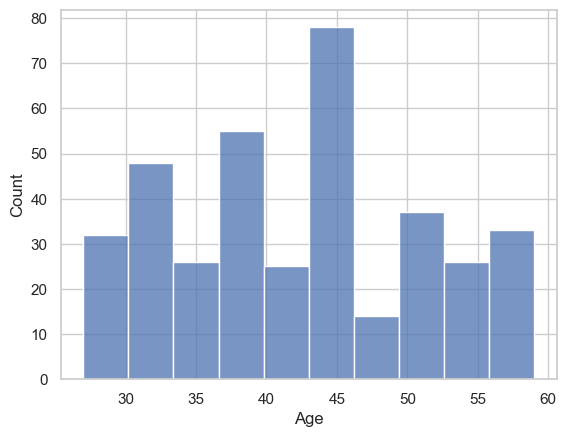

In [129]:
sns.histplot(data = sleephealth, x = 'Age');

## Formal Analysis

#### Multiple Regression

Start off with the most complex; multiple regression with all the explanatory variables (only excluding those that appeared in a highly correlated pair. See heatmap in EDA)

In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [133]:
sh = sleephealth.copy()
def colrename(df):
    newnames = [None]*len(df.columns)

    for i in range(len(df.columns)):
        newnames[i] = df.columns[i].replace(" ", "")
        
        df.rename(columns = {df.columns[i]:newnames[i]}, inplace = True)
    
    return df

In [134]:
colrename(sh)

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Model fit & summary

In [135]:
mod2 = ols('SleepDuration~Gender+Age+Occupation+DailySteps+StressLevel+BMICategory+SleepDisorder', data = sh).fit()

In [136]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          SleepDuration   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.66e-140
Time:                        15:09:58   Log-Likelihood:                -71.585
No. Observations:                 374   AIC:                             183.2
Df Residuals:                     354   BIC:                             261.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### ANCOVA

In [137]:
ancova2 = sm.stats.anova_lm(mod2, type = 2)
ancova2

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,3.490392,3.490392,38.479365,1.544703e-09
Occupation,10.0,92.862136,9.286214,102.374647,4.614200e-98
BMICategory,3.0,3.125154,1.041718,11.484283,3.342210e-07
SleepDisorder,2.0,3.790039,1.895019,20.891394,2.652805e-09
Age,1.0,35.908714,35.908714,395.870919,1.163400e-59
DailySteps,1.0,0.535118,0.535118,5.899335,1.564383e-02
StressLevel,1.0,64.312740,64.312740,709.007389,1.552826e-86
Residual,354.0,32.110681,0.090708,NaN,NaN


### Assumptions check: multiple linear regression

Linearity assumption: The relationship between the predictors and the response variable should be linear.

The points are mostly randomly scattered around y = 0; the assumption can be considered satisfied. Looking more closely, a slight downward trend seems apparent in the residuals. The model seems to overestimate the response at the lower end and underestimate it at the upper end. Perhaps a non-linear model can be fitted next to investigate this further. 

Homoscedasticity assumption: Residuals should exhibit constant variance across all levels of predictors

The same residuals vs predicted value plot can be used to check for homoscedasticity. Again there does seem to be some trend in the residuals that warrants further examination.

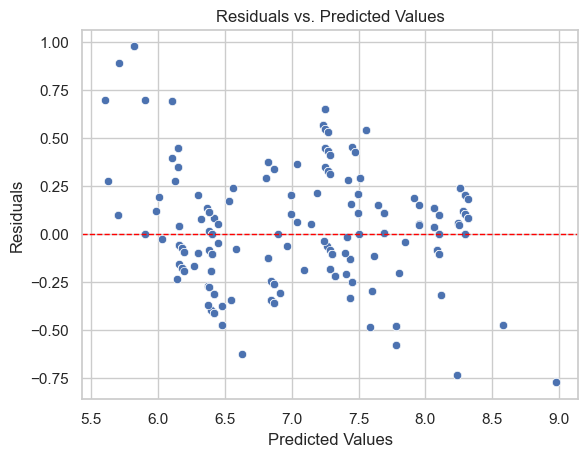

In [143]:
predicted_values = mod2.fittedvalues
residuals = mod2.resid

# Scatterplot of observed vs. predicted values
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


Normality of residuals assumption: Residuals should be approximately normally distributed.

The histogram shows that this assumption is satisfied. Although there are some deviations on the ends of the Q-Q plot, it is still acceptable.

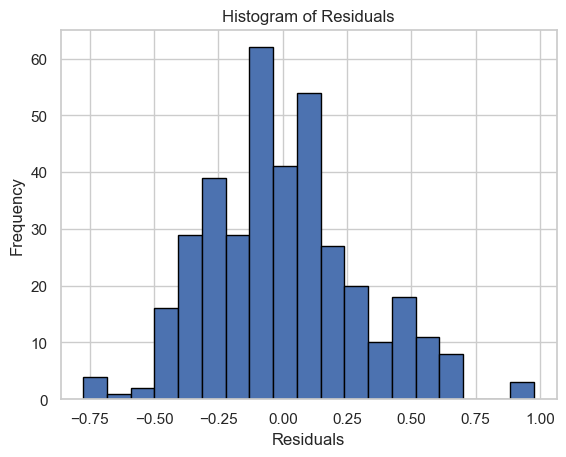

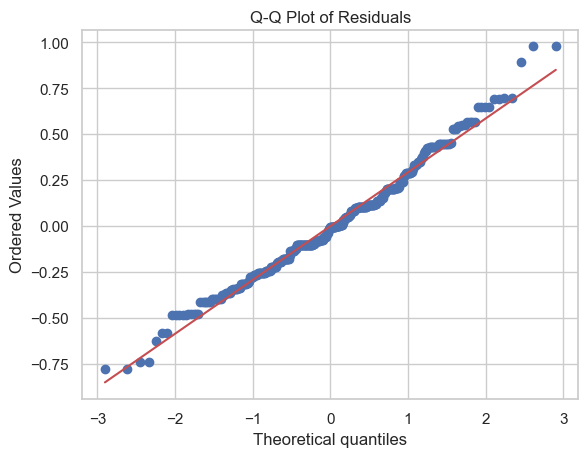

In [139]:
import scipy.stats as stats

# Histogram of residuals
plt.hist(residuals, bins='auto', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Independence of residuals assumption: Residuals should be independent of each other.

It has been assumed that the data was collected from independent individual subjects.

Multicollinearity assumption: predictors should not be highly correlated with each other

Explanatory variables have already been specifically selected in a way that controls for multicollinearity (see ReadMe file). The condition number of the model is high, indicating a high degree of mulitcollinearity, though this is most likely due to correlations between levels of categorical variables. 

In [155]:
mod2.condition_number

145191.22947445436

In [ ]:
sh.loc[:,['Age','DailySteps','StressLevel']].corr()

,Age,DailySteps,StressLevel
Age,1.000000,0.057973,-0.422344
DailySteps,0.057973,1.000000,0.186829
StressLevel,-0.422344,0.186829,1.000000
